# Clean Air-BnB

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data_air/AB_NYC_2019.csv")

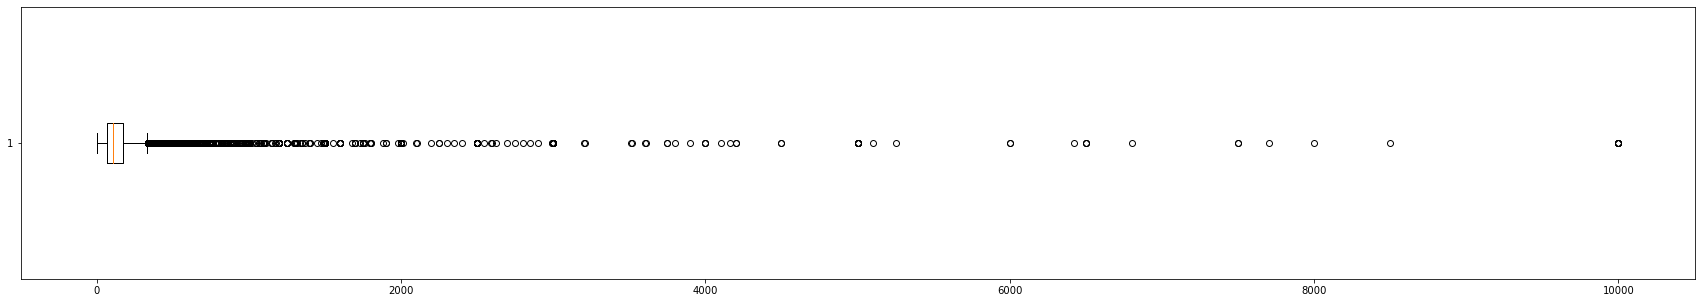

In [10]:
price_data = df.price.sort_values(ascending=False).reset_index(drop=True)
plt.figure(figsize=(30,5))
plt.boxplot(price_data, vert = False)
plt.show()

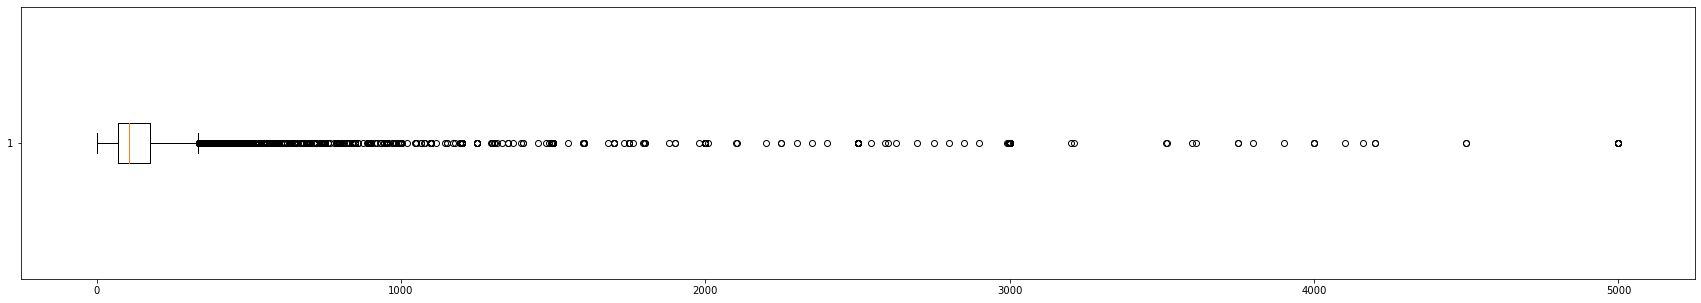

In [11]:
price_max = 5000
price_min = 0
df_new_price = df[(price_min <= df.price) & (df.price <= price_max)]
new_price_data = df_new_price.price.sort_values(ascending=False).reset_index(drop=True)
plt.figure(figsize=(30,5))
plt.boxplot(new_price_data, vert = False)
plt.show()

In [12]:
df.minimum_nights.sort_values(ascending=False).reset_index(drop=True).dropna()

0        1250
1        1000
2         999
3         999
4         999
         ... 
48890       1
48891       1
48892       1
48893       1
48894       1
Name: minimum_nights, Length: 48895, dtype: int64

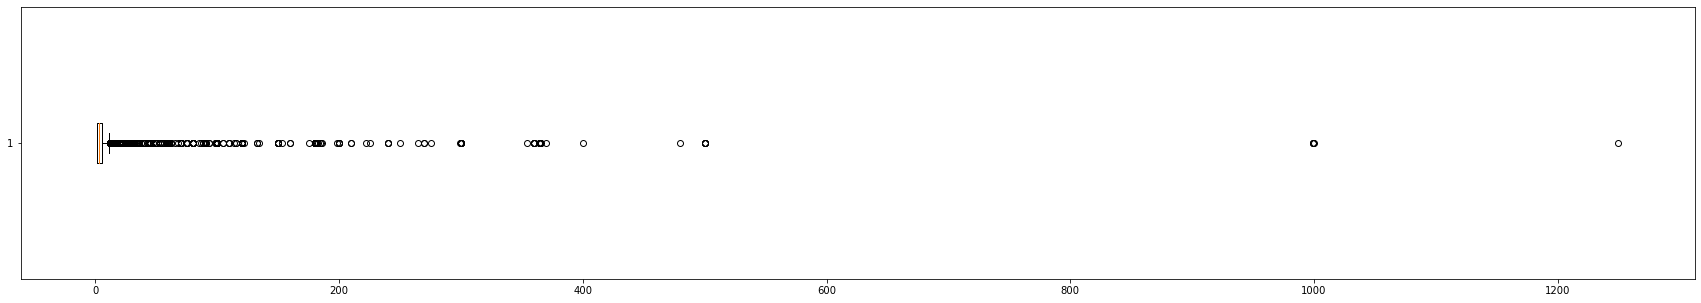

In [13]:
min_nights_data = df.minimum_nights.sort_values(ascending=False).reset_index(drop=True).dropna()
plt.figure(figsize=(30,5))
plt.boxplot(min_nights_data, vert = False)
plt.show()

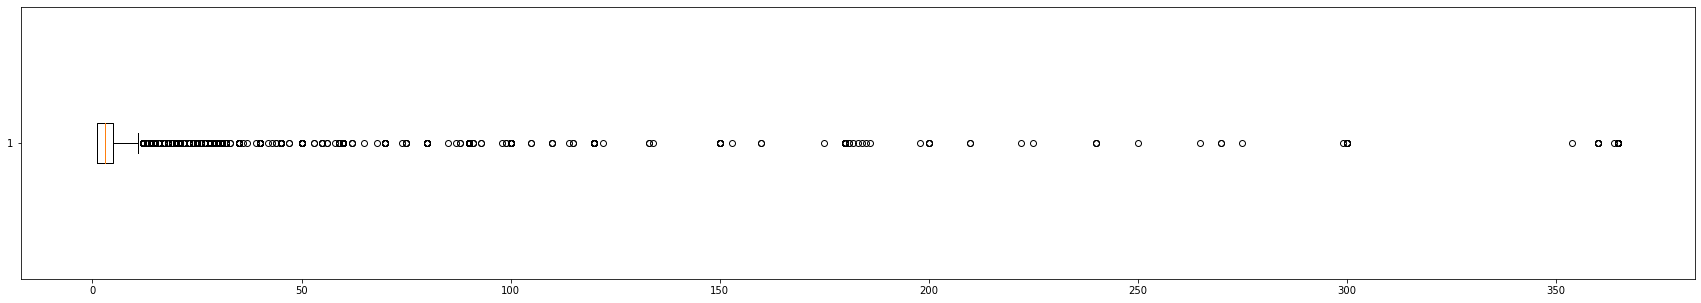

In [14]:
nights_max = 365
nights_min = 0
df_new_nights = df[(nights_min <= df.minimum_nights) & (df.minimum_nights <= nights_max)]
min_nights_data = df_new_nights.minimum_nights.sort_values(ascending=False).reset_index(drop=True).dropna()
plt.figure(figsize=(30,5))
plt.boxplot(min_nights_data, vert = False)
plt.show()

In [15]:
df = df_new_price
df = df_new_nights

In [16]:
categories = ['neighbourhood_group', 'neighbourhood']
other_cat_dic = {}
for cat in categories:
  other_cat_dic[cat] = {'tabel': df.groupby(cat).size().sort_values(ascending=False)}
  display(other_cat_dic[cat]['tabel'])
  print('----------------------------')

neighbourhood_group
Manhattan        21655
Brooklyn         20098
Queens            5664
Bronx             1091
Staten Island      373
dtype: int64

----------------------------


neighbourhood
Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2656
Bushwick              2464
Upper West Side       1971
                      ... 
New Dorp                 1
Willowbrook              1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
Length: 221, dtype: int64

----------------------------


In [17]:
# From output above choose threshold count to create 'Other' Category
other_thres = [20000, 100]
for i, cat in enumerate(categories):
  other_cat_dic[cat]['threadshold'] = other_thres[i]

func = lambda data: 'Other' if data in other_cats else data

for elem in other_cat_dic.values():
  other_cats = elem['tabel'][elem['tabel'].values < elem['threadshold']].index
  cat = elem['tabel'].axes[0].name
  df[cat + '_other'] = list(map(func, df[cat]))

for cat in categories:
  tmp = df.groupby(cat + '_other').size().sort_values(ascending=False)
  display(tmp)
  print('----------------------------')

neighbourhood_group_other
Manhattan    21655
Brooklyn     20098
Other         7128
dtype: int64

----------------------------


neighbourhood_other
Other                 4094
Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2656
Bushwick              2464
                      ... 
Cypress Hills          135
Little Italy           121
Maspeth                110
Midwood                109
Rego Park              106
Length: 66, dtype: int64

----------------------------


In [18]:
#df.drop(columns = categories, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_other,neighbourhood_other
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn,Kensington
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan,Midtown
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Manhattan,Harlem
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn,Clinton Hill
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan,East Harlem


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [20]:
columns_le_enc = ['neighbourhood_other',]
columns_oh_enc = ['neighbourhood_group_other', 'room_type']

le_enc = {}
for col in columns_le_enc:
  le_enc[col] = LabelEncoder()
  df[col + '_label'] = le_enc[col].fit_transform(df[col])

oh_enc = OneHotEncoder()
if len(columns_oh_enc) != 0:
  cols = df.loc[:,columns_oh_enc]
  cols_enc = oh_enc.fit_transform(cols).toarray()
  cols_enc_header = oh_enc.get_feature_names(columns_oh_enc)
  tmp = pd.DataFrame(data = cols_enc, columns = cols_enc_header)
  df = pd.concat([df,tmp], axis=1)

In [21]:
#df.drop(columns = columns_le_enc + columns_oh_enc, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,neighbourhood_group_other,neighbourhood_other,neighbourhood_other_label,neighbourhood_group_other_Brooklyn,neighbourhood_group_other_Manhattan,neighbourhood_group_other_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,...,365.0,Brooklyn,Kensington,35.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,...,355.0,Manhattan,Midtown,41.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,...,365.0,Manhattan,Harlem,30.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,...,194.0,Brooklyn,Clinton Hill,11.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,...,0.0,Manhattan,East Harlem,17.0,0.0,1.0,0.0,1.0,0.0,0.0


In [28]:
df.to_csv(r'data_air\AB_data_clean.csv', index=False)